# 1-Coleta de dados

In [41]:
#bibliotecas usadas
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [37]:
#importação do arquivo
#Pode fazer o download por meio desse link https://www.kaggle.com/datasets/arunjangir245/healthcare-insurance-expenses/

saude = pd.read_csv('insurance.csv', encoding = 'utf-8', nrows=300)

saude.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
saude = saude.fillna(0)

In [28]:
saude['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
saude.head(300)

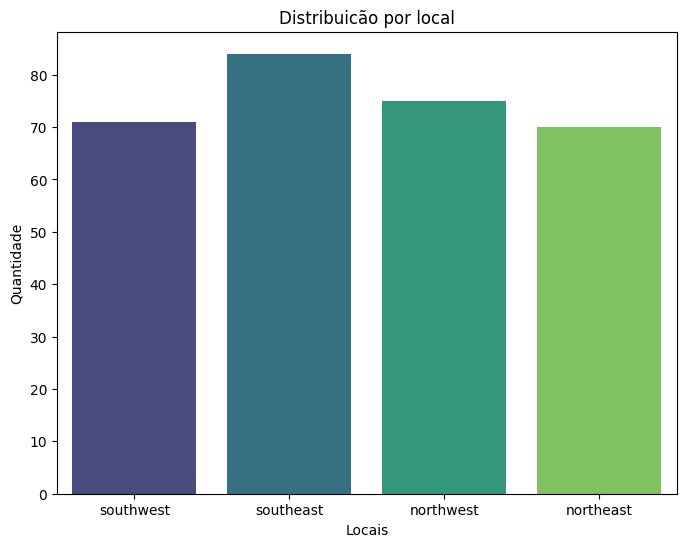

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=saude, palette='viridis')
plt.title('Distribuicão por local')
plt.xlabel('Locais')
plt.ylabel('Quantidade')
plt.show()

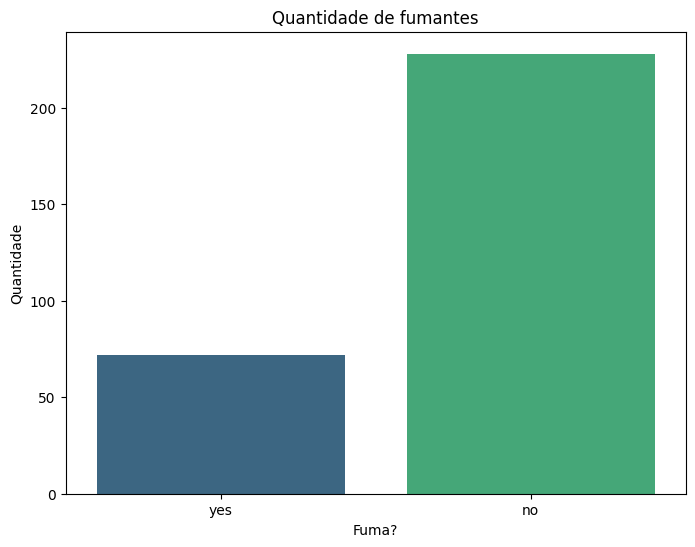

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=saude, palette='viridis')
plt.title('Quantidade de fumantes')
plt.xlabel('Fuma?')
plt.ylabel('Quantidade')
plt.show()

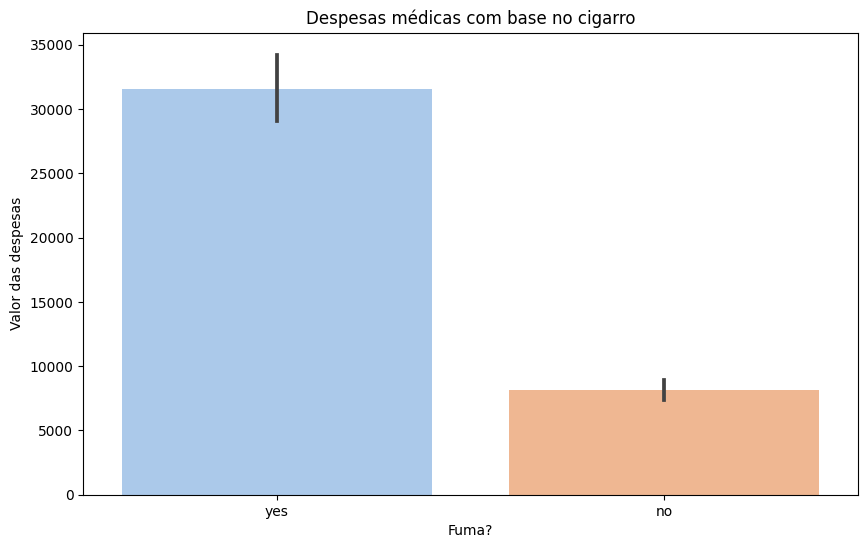

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=saude['smoker'], y=saude['charges'], palette='pastel')
plt.title('Despesas médicas com base no cigarro')
plt.xlabel('Fuma?')
plt.ylabel('Valor das despesas')
plt.show()

In [38]:
saude['age_std'] = saude['age'].apply(lambda num: (num - saude['age'].mean()) / saude['age'].std())
saude['bmi_std'] = saude['bmi'].apply(lambda num: (num - saude['bmi'].mean()) / saude['bmi'].std())
saude['children_std'] = saude['children'].apply(lambda num: (num - saude['children'].mean()) / saude['children'].std())
saude['charges_std'] = saude['charges'].apply(lambda num: (num - saude['charges'].mean()) / saude['charges'].std())

# 2-Modelagem

In [39]:
saude['sex_m_nom'] = saude['sex'].apply(lambda sex: 1 if sex == 'male' else 0)
saude['sex_f_nom'] = saude['sex'].apply(lambda sex: 1 if sex == 'female' else 0)

saude['southwest_nom'] = saude['region'].apply(lambda island: 1 if island == 'southwest' else 0)
saude['southeast_nom'] = saude['region'].apply(lambda island: 1 if island == 'southeast' else 0)
saude['northwest_nom'] = saude['region'].apply(lambda island: 1 if island == 'northwest' else 0)
saude['northeast_nom'] = saude['region'].apply(lambda island: 1 if island == 'northeast' else 0)

In [50]:
colunas = ['age',	'sex',	'bmi',	'children', 'region',	'charges']
saude = saude.drop(colunas, axis=1)

**Treino**/**teste**

In [52]:
model = DecisionTreeClassifier()

In [53]:
data = saude

predictors_train, predictors_test, target_train, target_test = train_test_split(
    data.drop(['smoker'], axis=1),
    data['smoker'],
    test_size=0.25,
    random_state=123
)

In [54]:
model = model.fit(predictors_train, target_train)

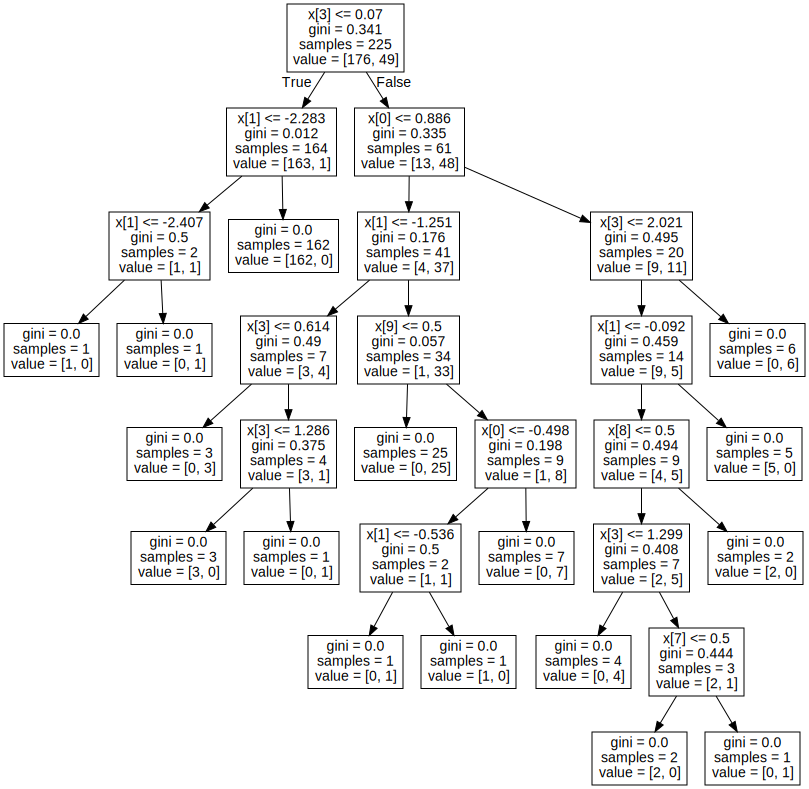

In [55]:
tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [56]:
target_predicted = model.predict(predictors_test)

confusion_matrix = confusion_matrix(target_test, target_predicted)
print(confusion_matrix)

[[49  3]
 [ 1 22]]


In [ ]:
total = confusion_matrix.sum()
print(total)

In [58]:
acertos = np.diag(confusion_matrix).sum()
print(acertos)

71


In [59]:
acuracia = acertos / total
print(f"{round(100 * acuracia, 2)}%")

94.67%


# 3-Conclusões

Como bem podemos ver com base nas avaliações e nos estudos feitos, o constante uso do cigarro afeta nossa saúde em níveis extremos, e isso acaba pesando no bolso também, pois, como pudemos observar o alto valor de despesas médicas está amplamente relacionado aos maus hábitos.

Além de sofrermos com os problemas acarretados pelo uso do cigarro, também teremos despesas indesejadas com o passar do tempo!